# Dataset

#### *Dataset: Hitters*
#### *Sport Art: Baseball*
#### *Description: We have some baseball players with their season '86 and also career statistics. And the most important data for the dataset, Salary is from Sports Illustrated.<br> Steps are gonna be like this: Firstly, we check the dataset if there is missing values or some outliers. And then we create some features.<br> Modelling part is gonna be with Linear Regression and we get the Test, Train scores.<br> At the end with our Model we try to predict salaries from baseball players, that they have no information about their salaries.*<br>

##### *Columns of Dataset:*

* ***AtBat:*** Number of times at bat in 1986
* ***Hits:*** Number of hits in 1986
* ***HmRun:*** Number of home runs in 1986
* ***Runs:*** Number of runs in 1986
* ***RBI:*** Number of runs batted in in 1986
* ***Walks:*** Number of walks in 1986
* ***Years:*** Number of years in the major leagues
* ***CAtBat:*** Number of times at bat during his career
* ***CHits:*** Number of hits during his career
* ***CHmRun:*** Number of home runs during his career
* ***CRuns:*** Number of runs during his career
* ***CRBI:*** Number of runs batted in during his career
* ***CWalks:*** Number of walks during his career
* ***League:*** A factor with levels A and N indicating player’s league at the end of 1986
* ***Division:*** A factor with levels E and W indicating player’s division at the end of 1986
* ***PutOuts:*** Number of put outs in 1986
* ***Assists:*** Number of assists in 1986
* ***Errors:*** Number of errors in 1986
* ***Salary:*** 1987 annual salary on opening day in thousands of dollars
* ***NewLeague:*** A factor with levels A and N indicating player’s league at the beginning of 1987

<hr style="height:2px;border-width:0;color:white;background-color:green">

# Import Dataset & Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hitters/Hitters.csv


In [3]:
df = pd.read_csv("/kaggle/input/hitters/Hitters.csv")

<hr style="height:2px;border-width:0;color:white;background-color:green">

# Dataset Preprocessing

In [4]:
def check_df(dataframe, head=5, tail=3):
    print("######################## Shape ########################\n")
    print(dataframe.shape)
    print("######################## Types ########################\n")
    print(dataframe.dtypes)
    print("######################## Head ########################\n")
    print(dataframe.head(head))
    print("######################## Tail ########################\n")
    print(dataframe.tail(tail))
    print("######################## NA ########################\n")
    print(dataframe.isnull().sum())
    print("\n\n######################## Quantiles ########################\n")
    print(dataframe.describe([0.05, 0.50, 0.75, 0.95, 0.99]).T)

check_df(df)

######################## Shape ########################

(322, 20)
######################## Types ########################

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
######################## Head ########################

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20     NaN         A
1    315    81      7    24   38     39     14    3449    835      69    321   414  

In [5]:
# As we see, Salary feature has some missing values.
# Here I want to seperate these players, who has no salary information and at final we can predict their salaries with model.
# Before Modelling we are gonna seperate them like as below.

# df_test = df[df["Salary"].isnull()]   # test
# df = df[~df["Salary"].isnull()]       # train

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


   League  Ratio
A     175 54.348
N     147 45.652
##########################################



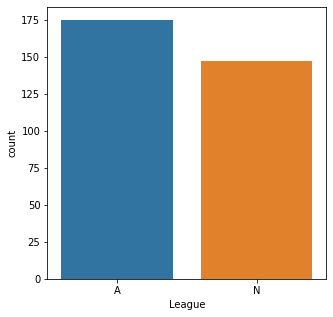

   Division  Ratio
W       165 51.242
E       157 48.758
##########################################



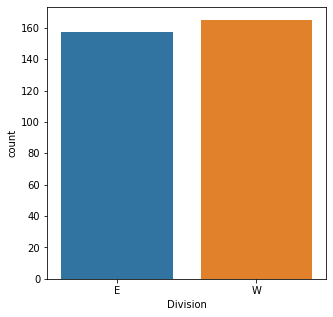

   NewLeague  Ratio
A        176 54.658
N        146 45.342
##########################################



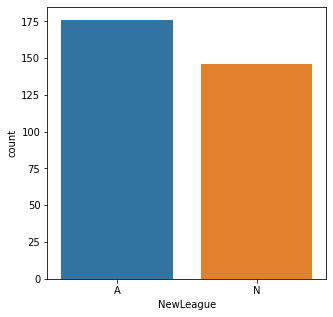

In [7]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################", end = "\n\n")
    if plot:
        plt.figure(figsize=[5, 5])
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col, True)

In [8]:
# Checking outliers...

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [9]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


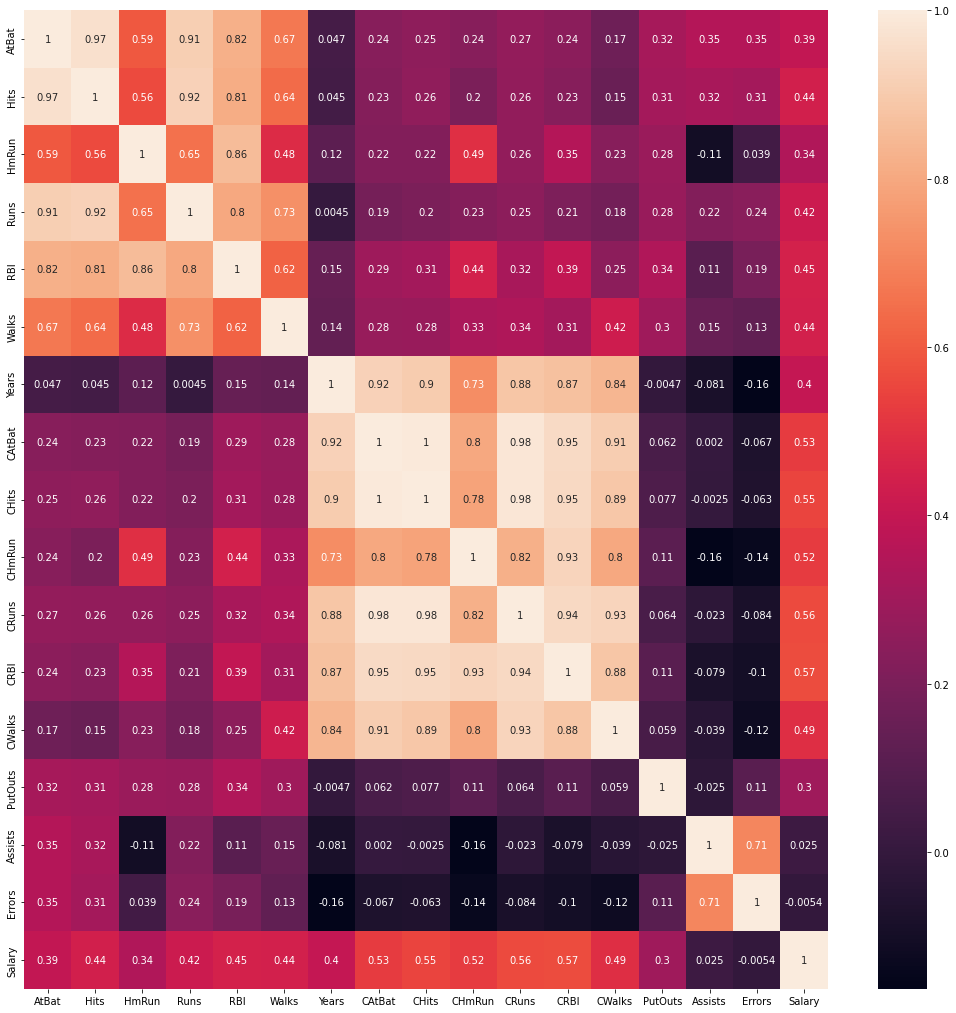

,1,2,corr
0,CHmRun,Errors,-0.888
1,CRBI,Errors,-0.852
107,RBI,AtBat,0.875
108,Hits,RBI,0.875
109,RBI,Runs,0.912
110,CHmRun,Years,0.916
111,Errors,Assists,0.922
112,CHits,CHmRun,0.933
113,CAtBat,CHmRun,0.934
114,HmRun,RBI,0.937


In [10]:
# Checking correlation...

def correlation_sum(dataframe, up_limit = 0.65, down_limit = -0.65, plot=False):
    corr_df = df.corr()

    if plot:
        plt.figure(figsize=[18, 18])
        sns.heatmap(corr_df, annot=True, xticklabels=corr_df.columns, yticklabels=corr_df.columns)
        plt.show()

    corr_df = dataframe.corr()
    corr_df = corr_df.corr().unstack().sort_values().drop_duplicates()
    corr_df = pd.DataFrame(corr_df, columns=["corr"])
    corr_df.index.names = ['1', '2']
    corr_df = corr_df.reset_index()
    high_corr = corr_df[(corr_df["corr"] >= up_limit) | (corr_df["corr"] <= down_limit)]

    return high_corr

correlation_sum(df, 0.85, -0.85, True)

#### Note: There are a lot of high correlation features but I don't want to drop some feature at that moment. We need all feature, because for the feature engineering all statistics can be useful. Let's begin create features...

<hr style="height:2px;border-width:0;color:white;background-color:green">

# Feature Engineering

In [11]:
num_cols = [col for col in num_cols if col not in ["Salary", "Years"]]
df[num_cols] = df[num_cols] + 1

# Percentages by Hits
df["New_Hits/AtBat"] = df["Hits"] / df["AtBat"]
df["New_HmRun/Hits"] = df["HmRun"] / df["Hits"]
df["New_Runs/Hits"] = df["Runs"] / df["Hits"]
df["New_RBI/Hits"] = df["RBI"] / df["Hits"]

df["New_CHits/CAtBat"] = df["CHits"] / df["CAtBat"]
df["New_CHmRun/CHits"] = df["CHmRun"] / df["CHits"]
df["New_CRuns/CHits"] = df["CRuns"] / df["CHits"]
df["New_CRBI/CHits"] = df["CRBI"] / df["CHits"]

# Career average statistics
df["New_CAtBat_mean"] = df["CAtBat"]/df["Years"]
df["New_CHits_mean"] = df["CHits"]/df["Years"]
df["New_CHmRun_mean"] = df["CHmRun"]/df["Years"]
df["New_CRBI_mean"] = df["CRBI"]/df["Years"]
df["New_CWalks_mean"] = df["CWalks"]/df["Years"]

# Players segmentation
df.loc[(df['Years'] < 4), 'New_Years_Cat'] = 'rookie'
df.loc[(df['Years'] >= 4) & (df['Years'] < 9), 'New_Years_Cat'] = 'pro'
df.loc[(df['Years'] >= 9) & (df['Years'] < 15), 'New_Years_Cat'] = 'experienced'
df.loc[(df['Years'] >= 15), 'New_Years_Cat'] = 'old'

# Transfer situation
df.loc[(df["League"] == "A") & (df["NewLeague"] == "N"), 'New_League_Move'] = "transfer_A_N"
df.loc[(df["League"] == "N") & (df["NewLeague"] == "A"), 'New_League_Move'] = "transfer_N_A"
df.loc[(df["League"] == "A") & (df["NewLeague"] == "A"), 'New_League_Move'] = "stayed_A"
df.loc[(df["League"] == "N") & (df["NewLeague"] == "N"), 'New_League_Move'] = "stayed_N"

# Benefits ans Loss
df["New_Errors/Walks"] = df["Errors"] / df["Walks"]
df["New_Benefit_Loss"] = df["Assists"] + df["PutOuts"] + df["Walks"] - df["Errors"]

# Advanced statistics
df["New_OBP"] = (df["Hits"] + df["Walks"] + (df["Hits"]/df["AtBat"])) / (df["AtBat"]+df["Walks"]+(df["Hits"]/df["AtBat"])+(df["RBI"]-df["Runs"]))
df["New_COBP"] = (df["CHits"] + df["CWalks"] + (df["CHits"]/df["CAtBat"])) / (df["CAtBat"]+df["CWalks"]+(df["CHits"]/df["CAtBat"])+(df["CRBI"]-df["CRuns"]))
df["New_SLG"] = ((4*df["HmRun"]) + df["Runs"])/df["AtBat"]
df["New_CSLG"] = ((4*df["CHmRun"]) + df["CRuns"])/df["CAtBat"]
df["New_COPS"] = df["New_COBP"] + df["New_CSLG"]
df["BABIP"] = (df["Hits"] - df["HmRun"]) / (df["AtBat"] - df["HmRun"] - df["Errors"] + (df["RBI"]-df["Runs"]))
df["New_ERA"] = df["Runs"] / ((df["Walks"]/df["Hits"]) * 9)
df["New_CERA"] = (df["CRuns"] / (df["CWalks"]/df["CHits"])) * 9
df["New_WHIP"] = (df["Walks"] + df["Hits"]) / (df["Walks"] / df["Hits"])
df["New_CWHIP"] = (df["CWalks"] + df["CHits"]) / (df["CWalks"] / df["CHits"])

In [12]:
# We got more columns :)
df.shape

(322, 47)

In [13]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 47
cat_cols: 5
num_cols: 42
cat_but_car: 0
num_but_cat: 0


In [14]:
# Checking quickly categoric columns by Salary 

def rating_summary(dataframe, col, target):
    print(dataframe.groupby(col)[target].mean())
    print("################################", end="\n\n")
    
for col in cat_cols:
    rating_summary(df, col, "Salary")

League
A   542.000
N   529.118
Name: Salary, dtype: float64
################################

Division
E   624.271
W   450.877
Name: Salary, dtype: float64
################################

NewLeague
A   537.113
N   534.554
Name: Salary, dtype: float64
################################

New_Years_Cat
experienced   821.289
old           602.967
pro           554.170
rookie        181.368
Name: Salary, dtype: float64
################################

New_League_Move
stayed_A       541.015
stayed_N       532.900
transfer_A_N   558.125
transfer_N_A   486.000
Name: Salary, dtype: float64
################################



In [15]:
# One Hot Encoding

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, True)

In [16]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 51
cat_cols: 9
num_cols: 42
cat_but_car: 0
num_but_cat: 9


In [17]:
num_cols = [col for col in num_cols if "Salary" not in col]

In [18]:
# Standard Scaler

ss = StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])

In [19]:
# Seperate who has no information about Salary

df_test = df[df["Salary"].isnull()]   # test
df = df[~df["Salary"].isnull()]       # train

<hr style="height:2px;border-width:0;color:white;background-color:green">

# Modelling

In [20]:
# Linear Regression

y=df["Salary"]
X=df.drop(["Salary", "CAtBat", "CHits", "CHmRun", "CRuns", "CRBI", "CWalks"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Train scores

y_pred = reg_model.predict(X_train)
print(f" Train RMSE:  {np.sqrt(mean_squared_error(y_train, y_pred)):.4f}")
print(f" Train R2:  {reg_model.score(X_train, y_train):.4f}")

 Train RMSE:  208.7231
 Train R2:  0.7837


In [22]:
# Test scores

y_pred = reg_model.predict(X_test)
print(f" Test RMSE:  {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f" Test R2:  {reg_model.score(X_test, y_test):.4f}")

 Test RMSE:  306.8485
 Test R2:  0.5426


In [23]:
# K-Fold Cross Validation
cv_score = np.mean(np.sqrt(-cross_val_score(reg_model, X, y, cv=10, scoring="neg_mean_squared_error")))
print(f" Score with CV:  {cv_score:.4f}")

 Score with CV:  296.5135


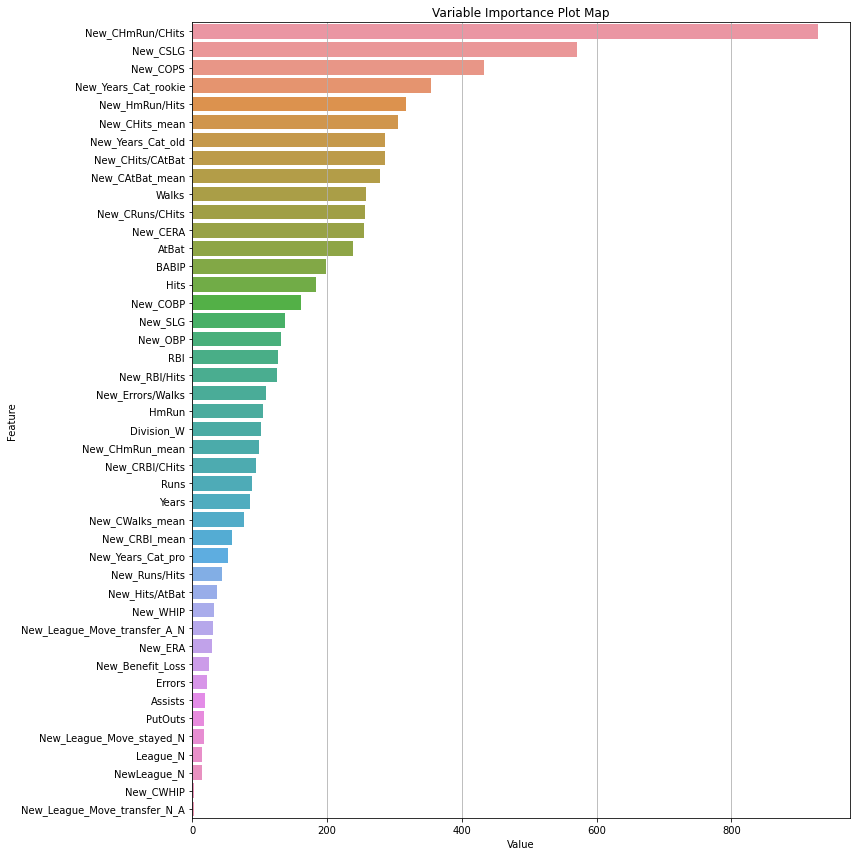

In [24]:
# Variable Importance

no_effect_list = ["Salary", "CAtBat", "CHits", "CHmRun", "CRuns", "CRBI", "CWalks"]

def variable_importance(dataframe, model, print=False, plot=False):
    df_col_names = [col for col in dataframe.columns if col not in no_effect_list]
    df_col_scores = [i for i in np.absolute(model.coef_)]
    df_col_names = pd.DataFrame(df_col_names, columns=["Feature"])
    df_col_scores = pd.DataFrame(df_col_scores, columns=["Score"])
    new_df = pd.concat([df_col_names, df_col_scores], axis=1)
    new_df = new_df.sort_values(by="Score", ascending=False)
    if print:
        for i in new_df.index:
            print(f"{new_df.values[i][0]} variable's score is: {new_df.values[i][1]:.4f}")
    if plot:
        feature_imp = pd.DataFrame({"Value": new_df.Score.tolist(), "Feature": new_df.Feature.tolist()})
        plt.figure(figsize=(12, 12))
        sns.barplot(x="Value", y="Feature", data=feature_imp)
        plt.title("Variable Importance Plot Map")
        plt.grid(axis="x")
        plt.tight_layout()
        plt.show()
        
variable_importance(df, reg_model, False, True)

<hr style="height:2px;border-width:0;color:white;background-color:green">

# Salary Predict with Model

In [25]:
# Let's look at our dataset with no salaries...

df_test = df_test.drop(no_effect_list, axis=1)
df_test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,PutOuts,Assists,Errors,New_Hits/AtBat,New_HmRun/Hits,New_Runs/Hits,New_RBI/Hits,New_CHits/CAtBat,New_CHmRun/CHits,New_CRuns/CHits,New_CRBI/CHits,New_CAtBat_mean,New_CHits_mean,New_CHmRun_mean,New_CRBI_mean,New_CWalks_mean,New_Errors/Walks,New_Benefit_Loss,New_OBP,New_COBP,New_SLG,New_CSLG,New_COPS,BABIP,New_ERA,New_CERA,New_WHIP,New_CWHIP,League_N,Division_W,NewLeague_N,New_Years_Cat_old,New_Years_Cat_pro,New_Years_Cat_rookie,New_League_Move_stayed_N,New_League_Move_transfer_A_N,New_League_Move_transfer_N_A
0,-0.574,-0.755,-1.124,-0.805,-0.728,-1.145,-1.310,0.560,-0.541,1.881,-1.004,-1.216,-0.430,-0.249,-1.408,-1.080,-0.469,-0.025,-0.223,-0.499,-0.973,-0.432,-0.945,1.319,0.148,-1.597,-2.015,-1.454,-1.367,-1.928,-0.150,-0.141,-0.870,-0.182,-0.890,0,0,0,0,0,1,0,0,0
15,-1.292,-1.337,-0.894,-1.190,-1.264,-1.284,-0.904,-0.610,-0.782,-1.265,-1.305,-0.275,0.186,-0.581,-2.017,-0.100,-0.156,-0.446,-1.925,-1.835,-1.074,-1.592,-1.591,-0.368,-0.947,-1.450,-2.144,-0.653,-0.692,-1.392,-0.629,-0.741,-0.927,-0.878,-0.948,0,1,0,0,0,1,0,0,0
18,0.170,0.064,-0.549,0.234,-0.192,1.215,0.926,2.223,-0.138,0.151,-0.159,-0.722,0.457,-0.449,0.810,-0.484,-0.801,-0.043,0.844,0.929,-0.001,0.757,1.374,-0.281,2.004,0.860,0.937,-0.540,-0.464,-0.055,0.122,-0.546,0.320,-0.522,0.630,0,1,0,0,0,0,0,0,0
22,-2.343,-1.962,-1.124,-1.805,-1.762,-1.747,-0.294,1.866,-0.168,0.465,6.178,0.822,-0.510,-1.465,2.233,0.181,-1.593,-0.647,-2.324,-2.085,-1.201,-1.783,-1.786,7.215,1.463,5.574,0.602,3.611,0.318,0.498,14.647,-1.113,-0.934,-1.246,-0.943,0,1,0,0,1,0,0,0,0
30,-0.443,-0.367,-0.204,-0.343,-0.690,0.012,1.943,-0.578,0.835,-0.164,0.224,-0.038,-0.003,-0.826,0.144,0.360,0.763,0.166,0.613,0.539,0.730,0.564,1.932,-0.219,-0.148,0.718,1.336,0.087,0.610,1.022,0.181,-0.554,0.579,-0.545,0.665,0,1,0,1,0,0,0,0,0


In [26]:
# Predict the salaries...

df_test["Salary"] = reg_model.predict(df_test)

In [27]:
df_test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,PutOuts,Assists,Errors,New_Hits/AtBat,New_HmRun/Hits,New_Runs/Hits,New_RBI/Hits,New_CHits/CAtBat,New_CHmRun/CHits,New_CRuns/CHits,New_CRBI/CHits,New_CAtBat_mean,New_CHits_mean,New_CHmRun_mean,New_CRBI_mean,New_CWalks_mean,New_Errors/Walks,New_Benefit_Loss,New_OBP,New_COBP,New_SLG,New_CSLG,New_COPS,BABIP,New_ERA,New_CERA,New_WHIP,New_CWHIP,League_N,Division_W,NewLeague_N,New_Years_Cat_old,New_Years_Cat_pro,New_Years_Cat_rookie,New_League_Move_stayed_N,New_League_Move_transfer_A_N,New_League_Move_transfer_N_A,Salary
0,-0.574,-0.755,-1.124,-0.805,-0.728,-1.145,-1.310,0.560,-0.541,1.881,-1.004,-1.216,-0.430,-0.249,-1.408,-1.080,-0.469,-0.025,-0.223,-0.499,-0.973,-0.432,-0.945,1.319,0.148,-1.597,-2.015,-1.454,-1.367,-1.928,-0.150,-0.141,-0.870,-0.182,-0.890,0,0,0,0,0,1,0,0,0,140.068
15,-1.292,-1.337,-0.894,-1.190,-1.264,-1.284,-0.904,-0.610,-0.782,-1.265,-1.305,-0.275,0.186,-0.581,-2.017,-0.100,-0.156,-0.446,-1.925,-1.835,-1.074,-1.592,-1.591,-0.368,-0.947,-1.450,-2.144,-0.653,-0.692,-1.392,-0.629,-0.741,-0.927,-0.878,-0.948,0,1,0,0,0,1,0,0,0,-206.613
18,0.170,0.064,-0.549,0.234,-0.192,1.215,0.926,2.223,-0.138,0.151,-0.159,-0.722,0.457,-0.449,0.810,-0.484,-0.801,-0.043,0.844,0.929,-0.001,0.757,1.374,-0.281,2.004,0.860,0.937,-0.540,-0.464,-0.055,0.122,-0.546,0.320,-0.522,0.630,0,1,0,0,0,0,0,0,0,870.392
22,-2.343,-1.962,-1.124,-1.805,-1.762,-1.747,-0.294,1.866,-0.168,0.465,6.178,0.822,-0.510,-1.465,2.233,0.181,-1.593,-0.647,-2.324,-2.085,-1.201,-1.783,-1.786,7.215,1.463,5.574,0.602,3.611,0.318,0.498,14.647,-1.113,-0.934,-1.246,-0.943,0,1,0,0,1,0,0,0,0,3036.031
30,-0.443,-0.367,-0.204,-0.343,-0.690,0.012,1.943,-0.578,0.835,-0.164,0.224,-0.038,-0.003,-0.826,0.144,0.360,0.763,0.166,0.613,0.539,0.730,0.564,1.932,-0.219,-0.148,0.718,1.336,0.087,0.610,1.022,0.181,-0.554,0.579,-0.545,0.665,0,1,0,1,0,0,0,0,0,479.506


#### Some players have to pay to their club, because they play really bad :)<br> Which salary negative is, it should be checked again...